## 梯度下降和随机梯度下降 — 从0开始
在之前的教程里，我们通过损失函数$\mathcal{L}$中参数的梯度$\nabla_{\theta}\mathcal{L}$来决定如何更新模型$\theta$的参数。我们也提到过学习率$\eta$，并给出了使用梯度下降算法更新模型参数的步骤：

$\theta_{t} \gets \theta_{t-1} - \eta \nabla_{\theta}\mathcal{L}_{t-1}$

在本节教程中，我们将详细介绍梯度下降算法和随机梯度下降算法。由于梯度下降是优化算法的核心部分，深刻理解梯度的意义十分重要。为了帮助大家深刻理解梯度，我们将从数学上阐释梯度下降的意义。

### 一维梯度下降
我们先以简单的一维梯度下降为例，解释梯度下降算法可以降低目标函数值的原因。一维梯度是一个标量，也称导数。

假设函数$f: \mathbb{R} \rightarrow \mathbb{R}$的输入和输出都是标量。根据泰勒展开公式，我们得到

$f(x + \epsilon) \approx f(x) + f'(x) \epsilon$


假设$\theta$是一个常数，将$\epsilon$替换为$-\eta f'(x)$后，我们有

$f(x - \eta f'(x)) \approx f(x) -  \eta f'(x)^2$

如果$\eta$是一个很小的正数，那么

$f(x - \eta f'(x)) \leq f(x)$

也就是说，如果当前导数$f'(x) \neq 0$，按照$x := x - \eta f'(x)$更新x可能降低$f(x)$的值。

由于导数$f'(x)$是梯度在一维空间的特殊情况，上述更新$x$的方法也即一维空间的梯度下降。一维空间的梯度下降如下方左图所示，参数$x$沿着梯度方向不断更新。

![image.png](http://zh.gluon.ai/_images/gd_and_overshooting.svg)
### 学习率
上述梯度下降算法中的$\eta$（取正数）叫做学习率或步长。需要注意的是，学习率过大可能会造成$x$迈过（overshoot）最优解，甚至不断发散而无法收敛，如上方右图所示。

然而，如果学习率过小，优化算法收敛速度会过慢。实际中，一个合适的学习率通常是需要通过实验调出来的。

### 多维梯度下降
现在我们考虑一个更广义的情况：目标函数的输入为向量，输出为标量。

假设目标函数$f: \mathbb{R}^d \rightarrow \mathbb{R}$的输入是一个多维向量$\mathbf{x} = [x_1, x_2, \ldots, x_d]^\top$。目标函数$f(x)$有关$x$的梯度是一个由偏导数组成的向量：

$\nabla_\mathbf{x} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\bigg]^\top.$.

为表示简洁，我们有时用$\nabla f(\mathbf{x})$代替$\nabla_\mathbf{x} f(\mathbf{x})$。梯度中每个偏导数元素$\partial f(\mathbf{x})/\partial x_i$代表着$f$在$x$有关输入$x_i$的变化率。为了测量$f$沿着单位向量$u$方向上的变化率，在多元微积分中，我们定义$f$在$x$上沿着$u$方向的方向导数为

$D_\mathbf{u} f(\mathbf{x}) = \lim_{h \rightarrow 0}  \frac{f(\mathbf{x} + h \mathbf{u}) - f(\mathbf{x})}{h}$

由链式法则，该方向导数可以改写为

$D_\mathbf{u} f(\mathbf{x}) = \nabla f(\mathbf{x}) \cdot \mathbf{u}$

方向导数$D_\mathbf{u} f(\mathbf{x})$给出了$f$在$x$上沿着所有可能方向的变化率。为了最小化$f$，我们希望找到$f$能被降低最快的方向。因此，我们可以通过$u$来最小化方向导数$D_\mathbf{u} f(\mathbf{x})$。

由于$D_\mathbf{u} f(\mathbf{x}) = \|\nabla f(\mathbf{x})\| \cdot \|\mathbf{u}\| \cdot \text{cos} (\theta) = \|\nabla f(\mathbf{x})\| \cdot \text{cos} (\theta)$， 其中$\theta$为$\nabla f(\mathbf{x})$和$u$之间的夹角，当$\theta = \pi$，$\cos (\theta)$取得最小值$-1$。因此，当$u$在梯度方向$\nabla f(\mathbf{x})$的相反方向时，方向导数$D_\mathbf{u} f(\mathbf{x})$被最小化。所以，我们可能通过下面的梯度下降算法来不断降低目标函数f的值：

$\mathbf{x} := \mathbf{x} - \eta \nabla f(\mathbf{x})$

相同地，其中$\eta$（取正数）称作学习率或步长。

### 随机梯度下降
然而，当训练数据集很大时，梯度下降算法可能会难以使用。为了解释这个问题，考虑目标函数

$f(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\mathbf{x}),$

其中$f_i(i)$是有关索引为$i$的训练数据点的损失函数。需要强调的是，梯度下降每次迭代的计算开销随着$n$线性增长。因此，当$n$很大时，每次迭代的计算开销很高。

这时我们需要随机梯度下降算法。在每次迭代时，该算法随机均匀采样$i$并计算$\nabla f_i(\mathbf{x})$。事实上，随机梯度$\nabla f_i(\mathbf{x})$是对梯度$\nabla f(\mathbf{x})$的无偏估计：

$\mathbb{E}_i \nabla f_i(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\mathbf{x}) = \nabla f(\mathbf{x})$

### 小批量随机梯度下降
广义上，每次迭代可以随机均匀采样一个由训练数据点索引所组成的小批量$\mathcal{B}$。类似地，我们可以使用

$\nabla f_\mathcal{B}(\mathbf{x}) = \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\nabla f_i(\mathbf{x})$

来更新$\mathbf{x}$：

$\mathbf{x} := \mathbf{x} - \eta \nabla f_\mathcal{B}(\mathbf{x}),$,
其中$|\mathcal{B}|$代表批量中索引数量，$\eta$（取正数）称作学习率或步长。同样，小批量随机梯度$\nabla f_\mathcal{B}(\mathbf{x})$也是对梯度$\nabla f(\mathbf{x})$的无偏估计:

$\mathbb{E}_\mathcal{B} \nabla f_\mathcal{B}(\mathbf{x}) = \nabla f(\mathbf{x}).$

这个算法叫做小批量随机梯度下降。该算法每次迭代的计算开销为$\mathcal{O}(|\mathcal{B}|)$。因此，当批量较小时，每次迭代的计算开销也较小。

### 算法实现和实验
我们只需要实现小批量随机梯度下降。当批量大小等于训练集大小时，该算法即为梯度下降；批量大小为1即为随机梯度下降。

In [23]:
# 小批量随机梯度下降。
def sgd(params, grads, lr, batch_size):
    for param, grad in zip(params, grads):
        param[:] = param - lr * grad / batch_size

实验中，我们以线性回归为例。其中真实参数`w`为[2, -3.4]，`b`为4.2。



In [27]:
import numpy as np
import random


# 生成数据集。
num_inputs = 1
num_examples = 1000
#true_w = [2, -3.4]
true_w = [2]

true_b = 4.2
X = np.random.normal(scale=1, size=(num_examples, num_inputs))
#y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y = true_w[0] * X[:, 0]+ true_b

y += .01 * np.random.normal(scale=1, size=y.shape)

#dataset = gluon.data.ArrayDataset(X, y)

# 构造迭代器。
import random
def data_iter(batch_size):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for batch_i, i in enumerate(range(0, num_examples, batch_size)):
        j = np.array(idx[i: min(i + batch_size, num_examples)])
        yield batch_i, X[j], y[j]

# 初始化模型参数。
def init_params():
    w = np.random.normal(scale=1, size=(num_inputs, 1))
    b = np.zeros((1,))
    params = [w, b]
    return params

# 线性回归模型。
def net(X, w, b):
    return np.dot(X, w) + b

# 损失函数。
def square_loss(yhat, y):
    return (yhat - np.reshape(y, yhat.shape)) ** 2 / 2

def cal_grad(yhat, y, X):
    #grad_w = np.expand_dims(np.array([-np.dot((yhat - np.reshape(y, yhat.shape)).T, X[:, 0]), -np.dot((yhat - np.reshape(y, yhat.shape)).T, X[:, 1])]), axis=1)
    grad_w = np.array([-np.dot((yhat - np.reshape(y, yhat.shape)).T, X[:, 0])])
    grad_b = -np.sum((yhat - np.reshape(y, yhat.shape)))
    return [grad_w, grad_b]

接下来定义训练函数。当`epoch`大于2时（epoch从1开始计数），学习率以自乘0.1的方式自我衰减。训练函数的period参数说明，每次采样过该数目的数据点后，记录当前目标函数值用于作图。例如，当period和batch_size都为10时，每次迭代后均会记录目标函数值。

In [28]:
%matplotlib inline
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

def train(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    w, b = init_params()
    total_loss = [np.mean(square_loss(net(X, w, b), y))]
    # 注意epoch从1开始计数。
    for epoch in range(1, epochs + 1):
        # 学习率自我衰减。
        if epoch > 2:
            lr *= 0.1
        for batch_i, data, label in data_iter(batch_size):
            output = net(data, w, b)
            loss = square_loss(output, label)
            grad =  cal_grad(label, output, data)
            sgd([w, b], grad, lr, batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(
                    np.mean(square_loss(net(X, w, b), y)))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, lr, epoch, total_loss[-1]))
    print('w:', np.reshape(w, (1, -1)),
          'b:', b, '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    mpl.rcParams['figure.figsize'] = 3.5, 2.5
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

当批量大小为1时，训练使用的是随机梯度下降。在当前学习率下，目标函数值在早期快速下降后略有波动。当epoch大于2，学习率自我衰减后，目标函数值下降后较平稳。最终学到的参数值与真实值较接近。



Batch size 1, Learning rate 0.200000, Epoch 1, loss 5.2834e-05
Batch size 1, Learning rate 0.200000, Epoch 2, loss 5.5215e-05
Batch size 1, Learning rate 0.020000, Epoch 3, loss 5.1553e-05
('w:', array([[2.00087656]]), 'b:', array([4.20027462]), '\n')


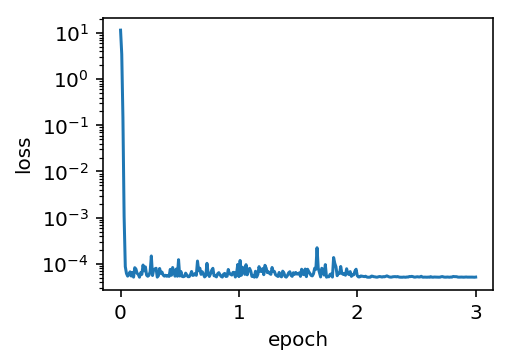

In [29]:
train(batch_size=1, lr=0.2, epochs=3, period=10)


当批量大小为1000时，由于训练数据集含1000个样本，此时训练使用的是梯度下降。在当前学习率下，目标函数值在前两个epoch下降较快。当epoch大于2，学习率自我衰减后，目标函数值下降较慢。最终学到的参数值与真实值较接近。

Batch size 1000, Learning rate 0.999000, Epoch 1, loss 7.6192e-03
Batch size 1000, Learning rate 0.999000, Epoch 2, loss 5.6739e-05
Batch size 1000, Learning rate 0.099900, Epoch 3, loss 5.5650e-05
('w:', array([[1.99787816]]), 'b:', array([4.19813197]), '\n')


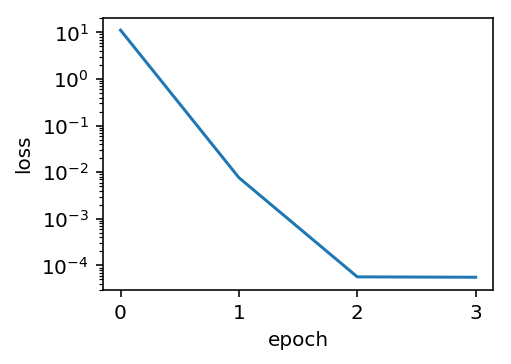

In [30]:
train(batch_size=1000, lr=0.999, epochs=3, period=1000)


当批量大小为10时，由于训练数据集含1000个样本，此时训练使用的是小批量随机梯度下降。最终学到的参数值与真实值较接近。



Batch size 10, Learning rate 0.200000, Epoch 1, loss 5.2107e-05
Batch size 10, Learning rate 0.200000, Epoch 2, loss 5.1249e-05
Batch size 10, Learning rate 0.020000, Epoch 3, loss 5.1154e-05
('w:', array([[1.99993381]]), 'b:', array([4.20038913]), '\n')


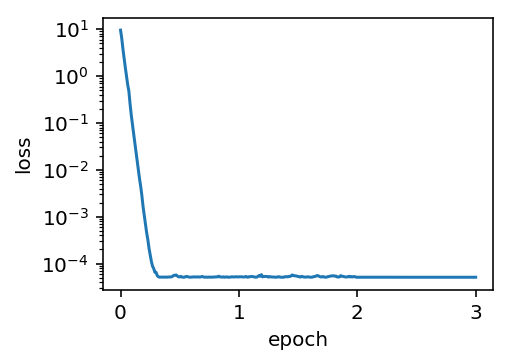

In [31]:
train(batch_size=10, lr=0.2, epochs=3, period=10)


同样是批量大小为10，我们把学习率改大。这时我们观察到目标函数值不断增大。这时典型的overshooting问题。

Batch size 10, Learning rate 5.000000, Epoch 1, loss 3.7514e+116
Batch size 10, Learning rate 5.000000, Epoch 2, loss 5.4473e+239
Batch size 10, Learning rate 0.500000, Epoch 3, loss 1.1102e+174
('w:', array([[8.49875393e+86]]), 'b:', array([-1.23838186e+87]), '\n')


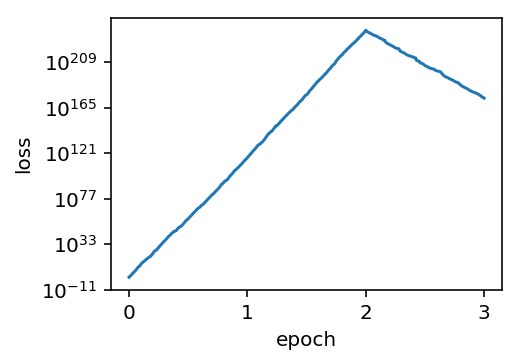

In [32]:
train(batch_size=10, lr=5, epochs=3, period=10)



同样是批量大小为10，我们把学习率改小。这时我们观察到目标函数值下降较慢，直到3个epoch也没能得到接近真实值的解。

Batch size 10, Learning rate 0.000002, Epoch 1, loss 1.1317e+01
Batch size 10, Learning rate 0.000002, Epoch 2, loss 1.1313e+01
Batch size 10, Learning rate 0.000000, Epoch 3, loss 1.1312e+01
('w:', array([[-0.1340087]]), 'b:', array([0.00178294]), '\n')


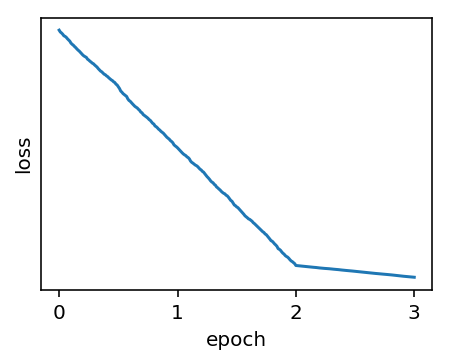

In [33]:
train(batch_size=10, lr=0.000002, epochs=3, period=10)


### 结论
当训练数据较大，梯度下降每次迭代计算开销较大，因而（小批量）随机梯度下降更受青睐。
学习率过大过小都有问题。合适的学习率要靠实验来调。